<a href="https://colab.research.google.com/github/MohitDhungana/duplicate_question_detection/blob/master/DQD_mohit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
print("TEST COLAB AND GITHUB INTEGRATION")

TEST COLAB AND GITHUB INTEGRATION


In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [29]:
!ls '/content/drive/My Drive'

 case-study-sample.gdoc			   'Computer Network'
 CG					    Datasets
'Ch04-Digital Transmission.gslides'	   'Endnote X8'
'Ch05-Analog Transmission.gslides'	    flower.csv
 Ch06-BWutilization-Mux-Spreading.gslides   OOAD_Final
 Ch07-TxmMedia.gslides			   'Project Management'
 Ch08-Switching-Forouzan.gslides	    Resume.gdoc
 Ch10-ErrorDetCorrection.gslides	   'Software engineering'
 COA					    stock_price.csv
'Colab Notebooks'


In [0]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [0]:
df=pd.read_csv('/content/drive/My Drive/Datasets/train.csv')

In [32]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [33]:
#input layer
left_input=tf.keras.layers.Input(shape=(50,))
right_input=tf.keras.layers.Input(shape=(50,))

#embedding layer
embedding_layer=tf.keras.layers.Embedding(input_dim=1000,output_dim=300,input_length=1000)

encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)

shared_lstm=tf.keras.layers.LSTM(50)
left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

# merge interpretation
merge = tf.keras.layers.concatenate([left_output, right_output])

#output layer
output = tf.keras.layers.Dense(1, activation='sigmoid')(merge)
model = tf.keras.Model(inputs=[left_input, right_input], outputs=output)

# summarize layers
print(model.summary())

# plot graph
tf.keras.utils.plot_model(model, to_file='shared_feature_extractor.png')
print('end')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 50, 300)      300000      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 50)           70200       embedding_2[0][0]                
          

In [34]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [37]:
import re
print('ab1c3')
print(re.sub(r"[a-z]",'','ab1c3'))
print(re.sub(r"[^a-z]",'','ab1c3'))

ab1c3
13
abc


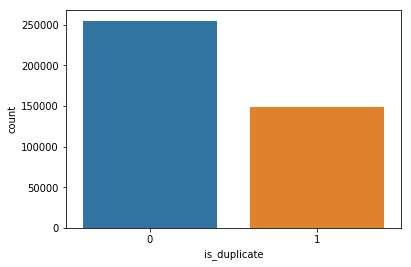

In [41]:
import seaborn as sns
sns.countplot(df['is_duplicate'],label='count')